# Example of a VAE model with prediction

This example demonstrates how to build a VAE model with prediction using the method `VAE.models.VAEp`.

In [1]:
from tensorflow.keras.utils import plot_model

from VAE.models import Encoder, LatentSampling, Decoder, VAEp
from VAE.utils import collection

We first define the parameters of the model:

In [2]:
params = {
    'encoder_blocks': 1,
    'cond_size': 12,
    'fc_units': 48,
    'filters': 16,
    'input_shape': [16, 7],
    'latent_dim': 10,
    'trainable': ['*bn*'],
    'prediction_shape': [16, 1],
}

Then we build the different parts of the model. We start with the encoder:


In [3]:
encoder = Encoder(**params, name='encoder')

and the latent sampling layer:


In [4]:
latent_sampling = LatentSampling(**params, name='latent')

Then we build the decoder:


In [5]:
decoder = Decoder(output_shape=params['input_shape'],
                  decoder_blocks=params['encoder_blocks'],
                  output_reverse=True,
                  **params,
                  name='decoder')

and a second decoder for the prediction:

In [6]:
prediction = Decoder(output_shape=params['prediction_shape'],
                     decoder_blocks=params['encoder_blocks'],
                     output_reverse=False,
                     **params,
                     name='prediction')

Once we have the different parts of the model, we can build the full model:


In [7]:
model = VAEp(encoder, decoder, latent_sampling, prediction, **params, name='VAEp')

Let's have a look at the model:


In [8]:
model.summary()

Model: "VAEp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 1, 16, 7)]   0                                            
__________________________________________________________________________________________________
encoder_cond (InputLayer)       [(None, 1, 12)]      0                                            
__________________________________________________________________________________________________
encoder (Functional)            [(None, 10), (None,  16496       encoder_input[0][0]              
                                                                 encoder_cond[0][0]               
__________________________________________________________________________________________________
latent (Functional)             (None, 1, 10)        0           encoder[0][0]                 

We can also have a look at the trainable parameters:


In [9]:
collection.summary_trainable(model)

________________________________________________________________________________
Layer                                    Type                           # params
VAEp                                     Functional                          222
________________________________________________________________________________
  encoder                                Functional                           78
    encoder_input_bn                     BatchNormalization                   14
    encoder_block_1                      Functional                           64
      encoder_block_1_R1_bn1             BatchNormalization                   32
      encoder_block_1_R1_bn2             BatchNormalization                   32
________________________________________________________________________________
  decoder                                Functional                           78
    decoder_block_1                      Functional                           64
      decoder_block_1_R1_bn1

and plot the model:


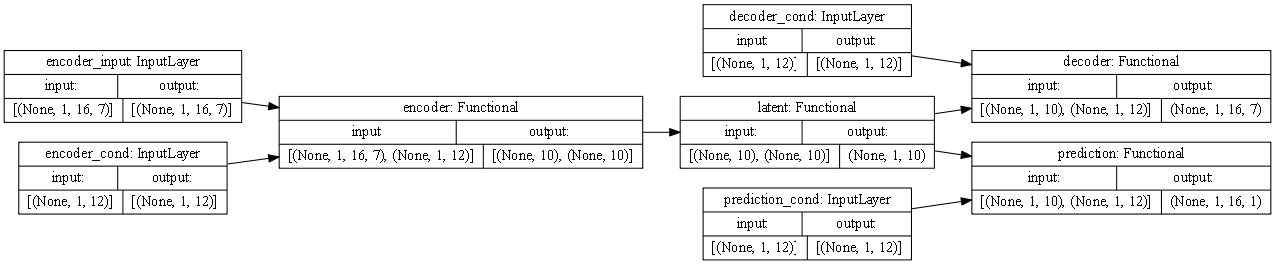

In [10]:
plot_model(model, show_shapes=True, dpi=75, rankdir='LR')